## Gymnasium *HandManipulateBlock-v1* env simulation

In [16]:
pip install --upgrade gymnasium -q

In [17]:
!pip install pybullet stable-baselines3 -q

In [18]:
!pip install gymnasium_robotics -q

## Import Necessary packages

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import gymnasium as gym
import gymnasium_robotics

## Gymnasium Env Setup

In [34]:
# Create environment
# If we want to have a visualization, set render_mode="human"
gym.register_envs(gymnasium_robotics)
env = gym.make('HandManipulateBlock-v1', render_mode=None)
print("Observation space:")
for k,v in env.observation_space.items():
    print(f"\t {k}: {v}")
print("Action space:", env.action_space)

Observation space:
	 achieved_goal: Box(-inf, inf, (7,), float64)
	 desired_goal: Box(-inf, inf, (7,), float64)
	 observation: Box(-inf, inf, (61,), float64)
Action space: Box(-1.0, 1.0, (20,), float32)


In [37]:
# Return values for reset()
obs_dict, info = env.reset()
print("obs_dict = ")
for k,v in obs_dict.items():
    print(f"\t {k}.shape: {v.shape}")
print("=========================================================")
print("info = ", info)

obs_dict = 
	 observation.shape: (61,)
	 achieved_goal.shape: (7,)
	 desired_goal.shape: (7,)
info =  {}


In [38]:
print(env.action_space.sample())

[ 0.65208423 -0.02686552 -0.27057996 -0.24240915 -0.9599974  -0.64865124
  0.27266973 -0.5459174   0.49604958 -0.04694087  0.39959836  0.85161084
  0.18092549  0.7489074  -0.86514896  0.1391398   0.17794022 -0.8830304
  0.89447826  0.01220307]


In [ ]:
# Return Value for one step
action = env.action_space.sample()  # Sample random action
print("action.shape = ", action.shape)
obs_dict, reward, terminated, truncated, info = env.step(action)

## Random Action Simulation example

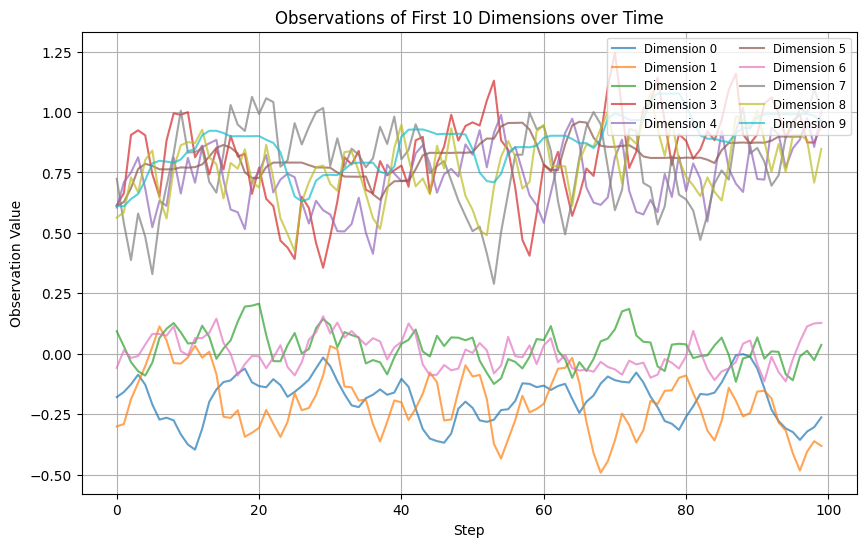

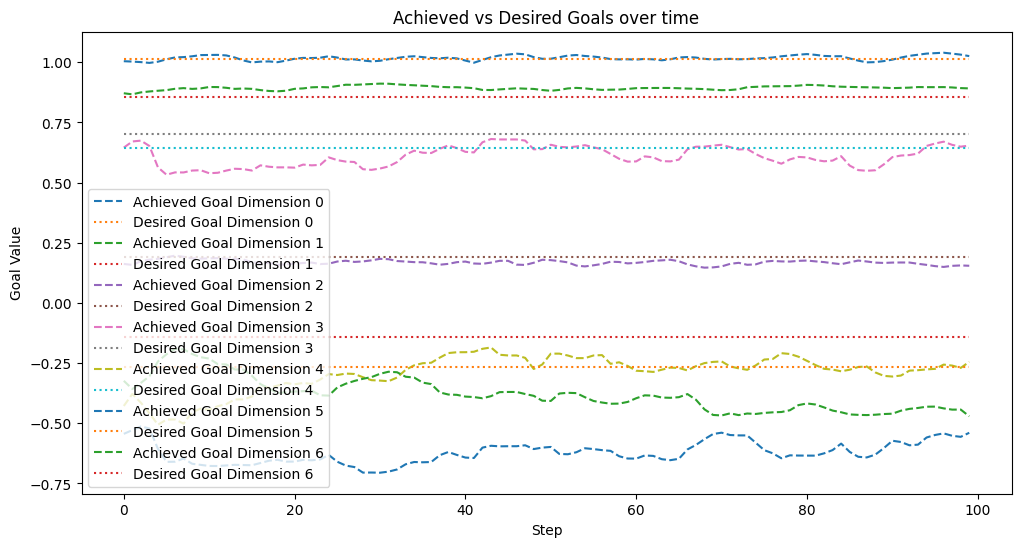

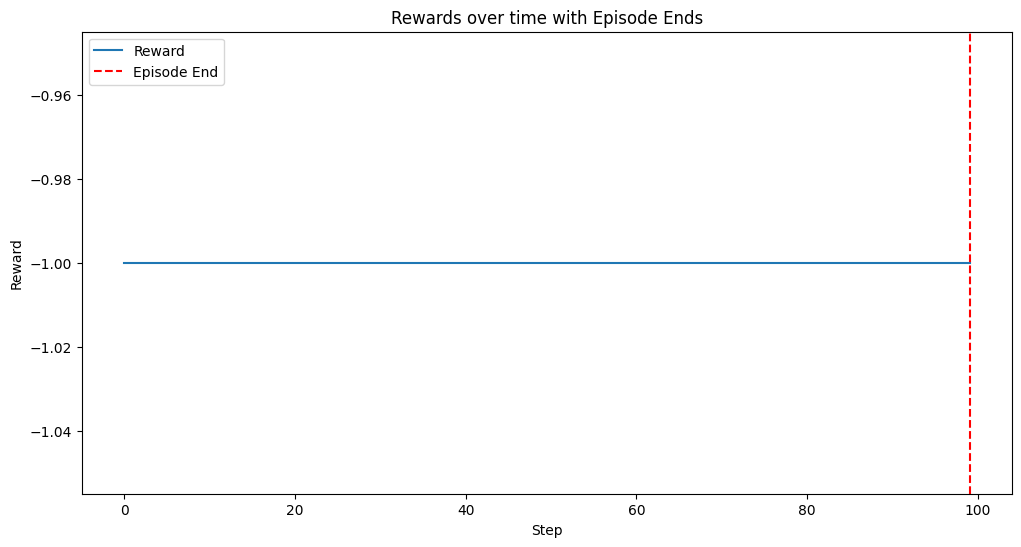

In [22]:
# Store observations, rewards, and episode termination steps
observations = []
achieved_goals = []
desired_goals = []
rewards = []
termination_steps = []

# Reset the environment
obs_dict, info = env.reset()
done = False
step = 0

# Run for 100 timesteps
while step < 100:
    action = env.action_space.sample()  # Sample random action
    obs_dict, reward, terminated, truncated, info = env.step(action)

    # Store observation, achieved_goal, and desired_goal
    observations.append(obs_dict['observation'])
    achieved_goals.append(obs_dict['achieved_goal'])
    desired_goals.append(obs_dict['desired_goal'])
    rewards.append(reward)

    # Check if episode ends
    if terminated or truncated:
        termination_steps.append(step)
        env.reset()  # Reset environment after episode ends

    step += 1

env.close()

# Convert observations to NumPy arrays
observations = np.array(observations)
achieved_goals = np.array(achieved_goals)
desired_goals = np.array(desired_goals)

# Plot observations (first 10 dimensions)
num_dimensions = 10  # Adjust number of dimensions to plot
plt.figure(figsize=(10, 6))

for i in range(num_dimensions):
    plt.plot(observations[:, i], label=f'Dimension {i}', alpha=0.7)  # Set transparency

plt.legend(loc='upper right', fontsize='small', ncol=2)  # Reduce legend font size, increase columns
plt.title(f'Observations of First {num_dimensions} Dimensions over Time')
plt.xlabel('Step')
plt.ylabel('Observation Value')
plt.grid(True)  # Add grid for better visualization
plt.show()

# Plot comparison between achieved_goal and desired_goal
plt.figure(figsize=(12, 6))
for i in range(achieved_goals.shape[1]):
    plt.plot(achieved_goals[:, i], label=f'Achieved Goal Dimension {i}', linestyle='--')
    plt.plot(desired_goals[:, i], label=f'Desired Goal Dimension {i}', linestyle=':')
plt.legend()
plt.title('Achieved vs Desired Goals over time')
plt.xlabel('Step')
plt.ylabel('Goal Value')
plt.show()

# Plot reward curve and mark episode ends
plt.figure(figsize=(12, 6))
plt.plot(rewards, label="Reward")
for term_step in termination_steps:
    plt.axvline(x=term_step, color='r', linestyle='--', label='Episode End')
plt.title('Rewards over time with Episode Ends')
plt.xlabel('Step')
plt.ylabel('Reward')
plt.legend()
plt.show()
